## KNNRegressor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Data/Real-Data/Real_Combine.csv')



In [3]:
df.shape

(724, 9)

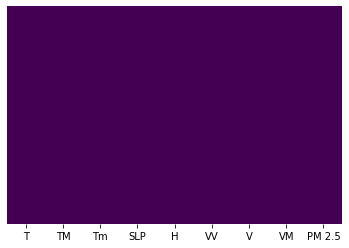

In [4]:
## Check for null values

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
df=df.dropna()

In [6]:
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

In [7]:
## check null values
X.isnull()

T     TM     Tm    SLP      H     VV      V     VM
0    False  False  False  False  False  False  False  False
1    False  False  False  False  False  False  False  False
2    False  False  False  False  False  False  False  False
3    False  False  False  False  False  False  False  False
4    False  False  False  False  False  False  False  False
..     ...    ...    ...    ...    ...    ...    ...    ...
719  False  False  False  False  False  False  False  False
720  False  False  False  False  False  False  False  False
721  False  False  False  False  False  False  False  False
722  False  False  False  False  False  False  False  False
723  False  False  False  False  False  False  False  False

[723 rows x 8 columns]

In [8]:
y.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
719    False
720    False
721    False
722    False
723    False
Name: PM 2.5, Length: 723, dtype: bool

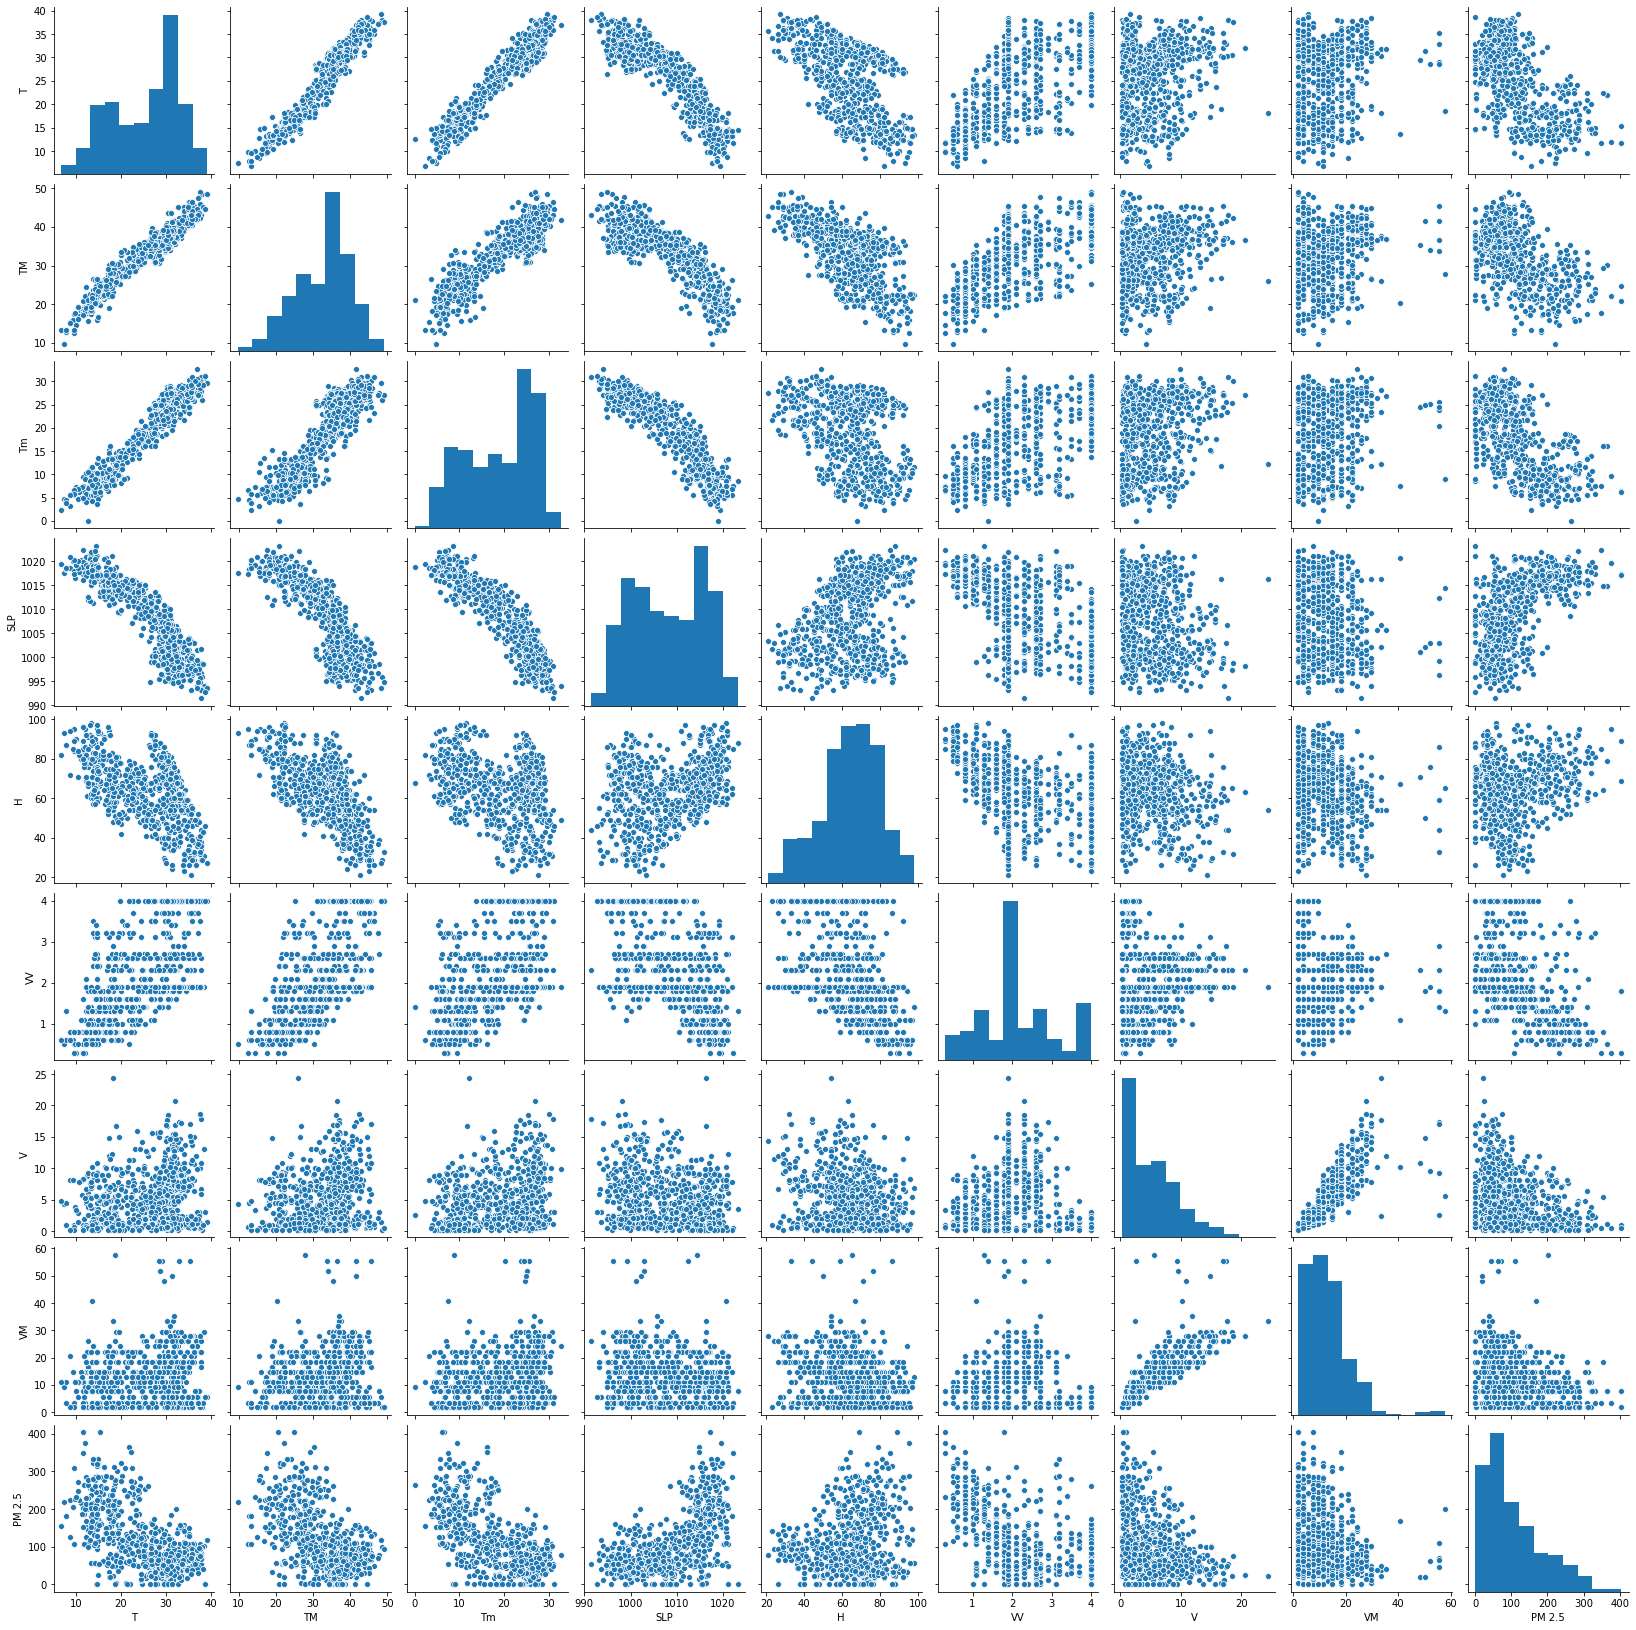

In [9]:
sns.pairplot(df)

In [10]:
df.corr()

T        TM        Tm       SLP         H        VV         V  \
T       1.000000  0.962046  0.960562 -0.900830 -0.547844  0.531975  0.227187   
TM      0.962046  1.000000  0.882490 -0.838453 -0.643086  0.576000  0.173272   
Tm      0.960562  0.882490  1.000000 -0.912126 -0.355187  0.434296  0.269996   
SLP    -0.900830 -0.838453 -0.912126  1.000000  0.340243 -0.423859 -0.262291   
H      -0.547844 -0.643086 -0.355187  0.340243  1.000000 -0.455955 -0.228151   
VV      0.531975  0.576000  0.434296 -0.423859 -0.455955  1.000000 -0.135399   
V       0.227187  0.173272  0.269996 -0.262291 -0.228151 -0.135399  1.000000   
VM      0.164489  0.120056  0.201158 -0.192608 -0.182609 -0.222236  0.827496   
PM 2.5 -0.626785 -0.550984 -0.673735  0.611264  0.182983 -0.487422 -0.333484   

              VM    PM 2.5  
T       0.164489 -0.626785  
TM      0.120056 -0.550984  
Tm      0.201158 -0.673735  
SLP    -0.192608  0.611264  
H      -0.182609  0.182983  
VV     -0.222236 -0.487422  
V       0.827496 -0.333484  
VM      1.000000 -0.249867  
PM 2.5 -0.249867  1.000000

### Correlation Matrix with Heatmap


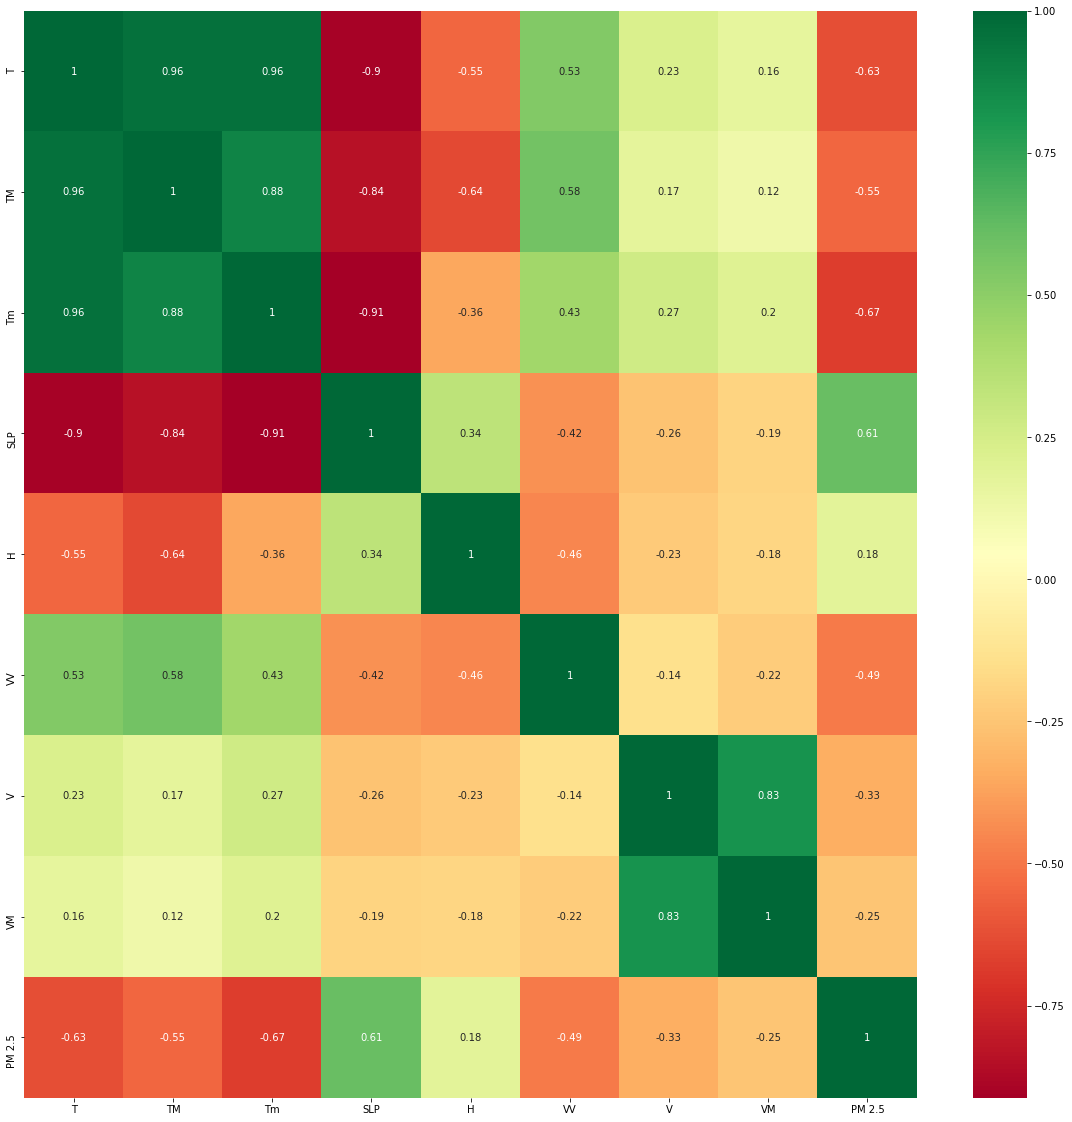

In [12]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [13]:
corrmat.index

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

### Feature Importance


In [14]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [15]:
X.head()

T    TM   Tm     SLP     H   VV    V    VM
0   7.4   9.8  4.8  1017.6  93.0  0.5  4.3   9.4
1   7.8  12.7  4.4  1018.5  87.0  0.6  4.4  11.1
2   6.7  13.4  2.4  1019.4  82.0  0.6  4.8  11.1
3   8.6  15.5  3.3  1018.7  72.0  0.8  8.1  20.6
4  12.4  20.9  4.4  1017.3  61.0  1.3  8.7  22.2

In [16]:
print(model.feature_importances_)

[0.14618016 0.07798059 0.25833757 0.1090303  0.07586838 0.22960921
 0.06087242 0.04212137]


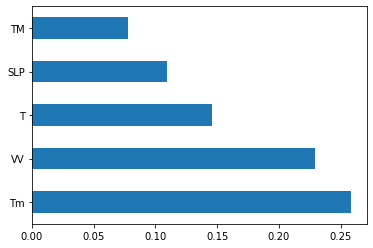

In [17]:

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

### K Nearest Neighbor Regression

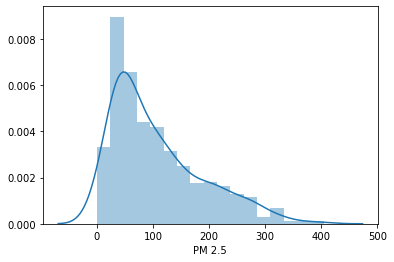

In [18]:
sns.distplot(y)

### Train Test split

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [20]:
from sklearn.neighbors import KNeighborsRegressor

In [21]:
regressor=KNeighborsRegressor(n_neighbors=1)
regressor.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [22]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 1.0


In [23]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.11067852470174866


In [24]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [25]:
score.mean()

0.06808707830586953

#### Model Evaluation

In [26]:
prediction=regressor.predict(X_test)

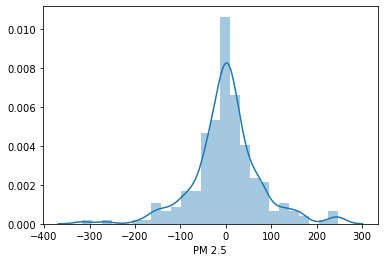

In [27]:
sns.distplot(y_test-prediction)

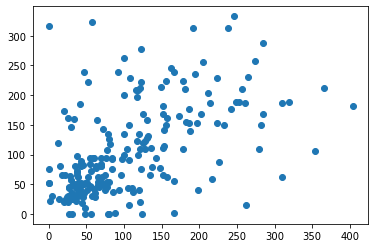

In [28]:
plt.scatter(y_test,prediction)

## Hyperparameter Tuning

In [29]:
accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsRegressor(n_neighbors=i)
    score=cross_val_score(knn,X,y,cv=10,scoring="neg_mean_squared_error")
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy Rate')

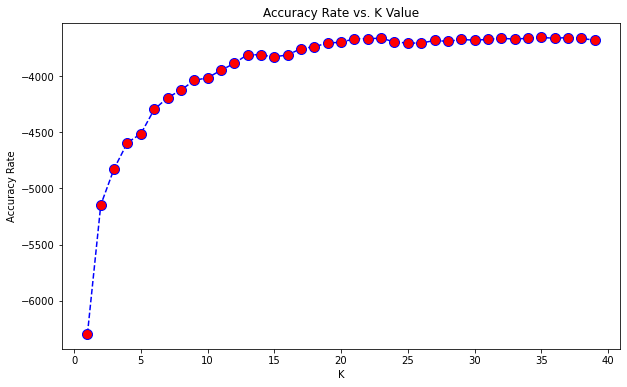

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
#plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
 #        markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [31]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsRegressor(n_neighbors=1)

knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

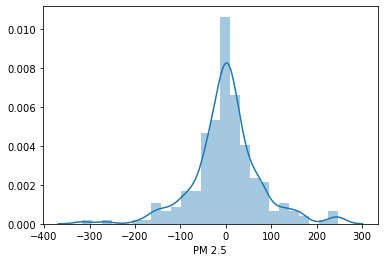

In [32]:
sns.distplot(y_test-predictions)

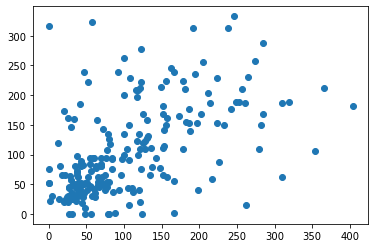

In [33]:
plt.scatter(y_test,predictions)

In [34]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 51.62824500768049
MSE: 5765.064164026497
RMSE: 75.92801962402612


In [35]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsRegressor(n_neighbors=3)

knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

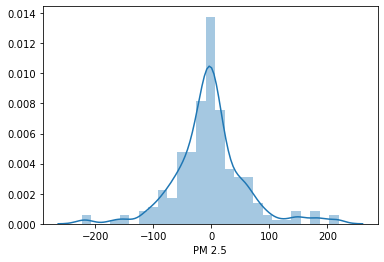

In [36]:
sns.distplot(y_test-predictions)

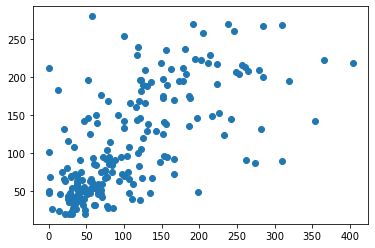

In [37]:
plt.scatter(y_test,predictions)

In [38]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 42.10013440860214
MSE: 3823.788048328426
RMSE: 61.836785559474436


In [39]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
rf = RandomForestRegressor()

In [41]:
from sklearn.model_selection import RandomizedSearchCV

# Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [42]:
from sklearn import metrics

In [43]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 51.62824500768049
MSE: 5765.064164026497
RMSE: 75.92801962402612


In [44]:
import pickle 

In [45]:
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

NameError: name 'rf_random' is not defined